## Carregando pacotes que serão utilizados na Análise

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm


### Base de Dados Enem 2021 - download microdados [aqui](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)

In [2]:
dfMicroDados = pd.read_csv("MICRODADOS_ENEM_2021.csv", sep=";", encoding='latin-1')
dfItens = pd.read_csv("ITENS_PROVA_2021.csv", sep=";", encoding='latin-1')

In [3]:
dfMicroDados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

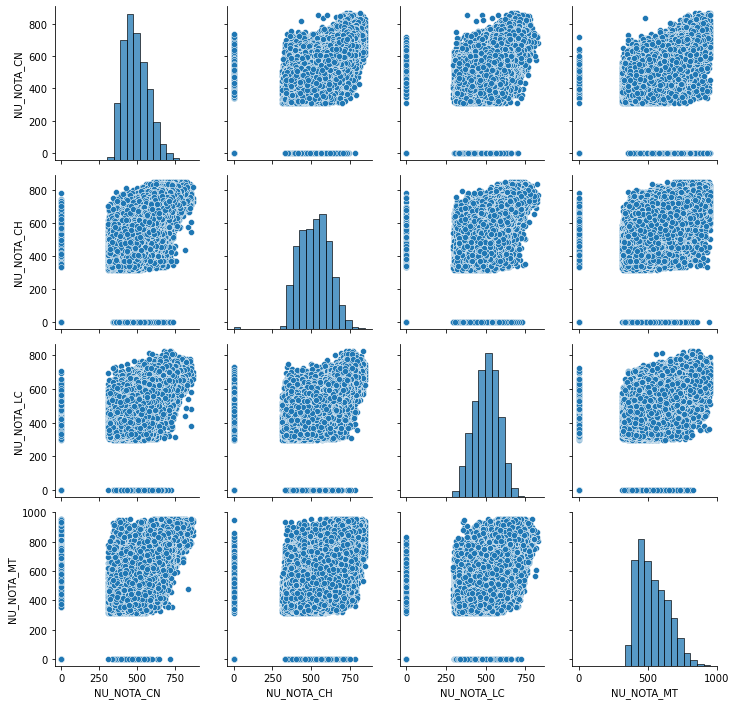

In [3]:
g = sns.PairGrid(dfMicroDados[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']])
g.map_diag(sns.histplot, bins=20)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [16]:
dfMicroDados[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
count,2.245844e+06,2.378379e+06,2.378379e+06,2.245844e+06
mean,4.917857e+02,5.199434e+02,5.025556e+02,5.350802e+02
std,8.056676e+01,9.579050e+01,7.916405e+01,1.106267e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.310000e+02,4.454000e+02,4.476000e+02,4.447000e+02
50%,4.820000e+02,5.219000e+02,5.059000e+02,5.154000e+02
75%,5.458000e+02,5.893000e+02,5.588000e+02,6.139000e+02
max,8.671000e+02,8.469000e+02,8.261000e+02,9.531000e+02


**Seguimos interessados em entender melhor o desempenho da variável NU_NOTA_MT!!**

**Perguntas Elaboradas sobre a base de dados**

- Influência do ano em que concluiu o ensino médio na nota final
- Influência da faixa etária na nota final
- O quanto a faixa etária e o ano em que concluiu o ensino médio são responsáveis pela variância na nota final da prova

In [5]:
df1=dfMicroDados[['NU_NOTA_MT', 'TP_COR_RACA','TP_ESCOLA','TP_SEXO','Q002','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'
                  ,'TP_ANO_CONCLUIU']]

### Analisando os missings da Base

-> Retirando da Análise os alunos que faltaram no dia da prova

Aproximadamente 30% dos alunos

In [38]:
df1.NU_NOTA_MT.isna().sum()/df1.shape[0]

0.33747631151042295

In [7]:
df2=df1[df1.NU_NOTA_MT.isna()==False]
df2.shape

(2245844, 9)

In [8]:
### Nulos na base filtrada
df2.isnull().sum()

NU_NOTA_MT            0
TP_COR_RACA           0
TP_ESCOLA             0
TP_SEXO               0
Q002                  1
NU_NOTA_CN            0
NU_NOTA_CH         7737
NU_NOTA_LC         7737
TP_ANO_CONCLUIU       0
dtype: int64

In [9]:
df2.TP_SEXO.value_counts()

F    1386041
M     859803
Name: TP_SEXO, dtype: int64

In [14]:
df2.Q002.value_counts().sort_values()

A     48353
H     49219
C    227128
B    244449
D    246368
G    310740
F    322164
E    797422
Name: Q002, dtype: int64

In [16]:
df2.TP_ANO_CONCLUIU.value_counts()

0     1308581
1      277350
2      158710
3      100288
15      94259
4       70929
5       50613
6       38994
7       31045
8       24788
9       21019
10      17027
11      15399
12      13866
13      11901
14      11075
Name: TP_ANO_CONCLUIU, dtype: int64

In [17]:
df2.head()

,NU_NOTA_MT,TP_COR_RACA,TP_ESCOLA,TP_SEXO,Q002,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_ANO_CONCLUIU
1,461.5,1,1,M,B,505.9,551.8,498.3,11
3,659.5,3,2,M,B,580.7,678.9,638.9,0
4,582.6,3,2,F,E,497.7,532.4,457.6,0
8,493.4,3,2,F,B,487.4,476.5,450.7,0
9,413.3,3,2,F,D,507.6,539.2,494.6,0


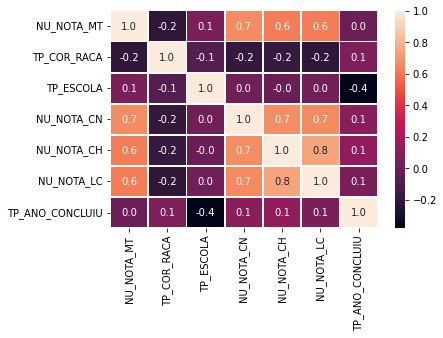

In [18]:
# análise de correlação
correlation = df2.corr()

# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

### Visualização dos Dados

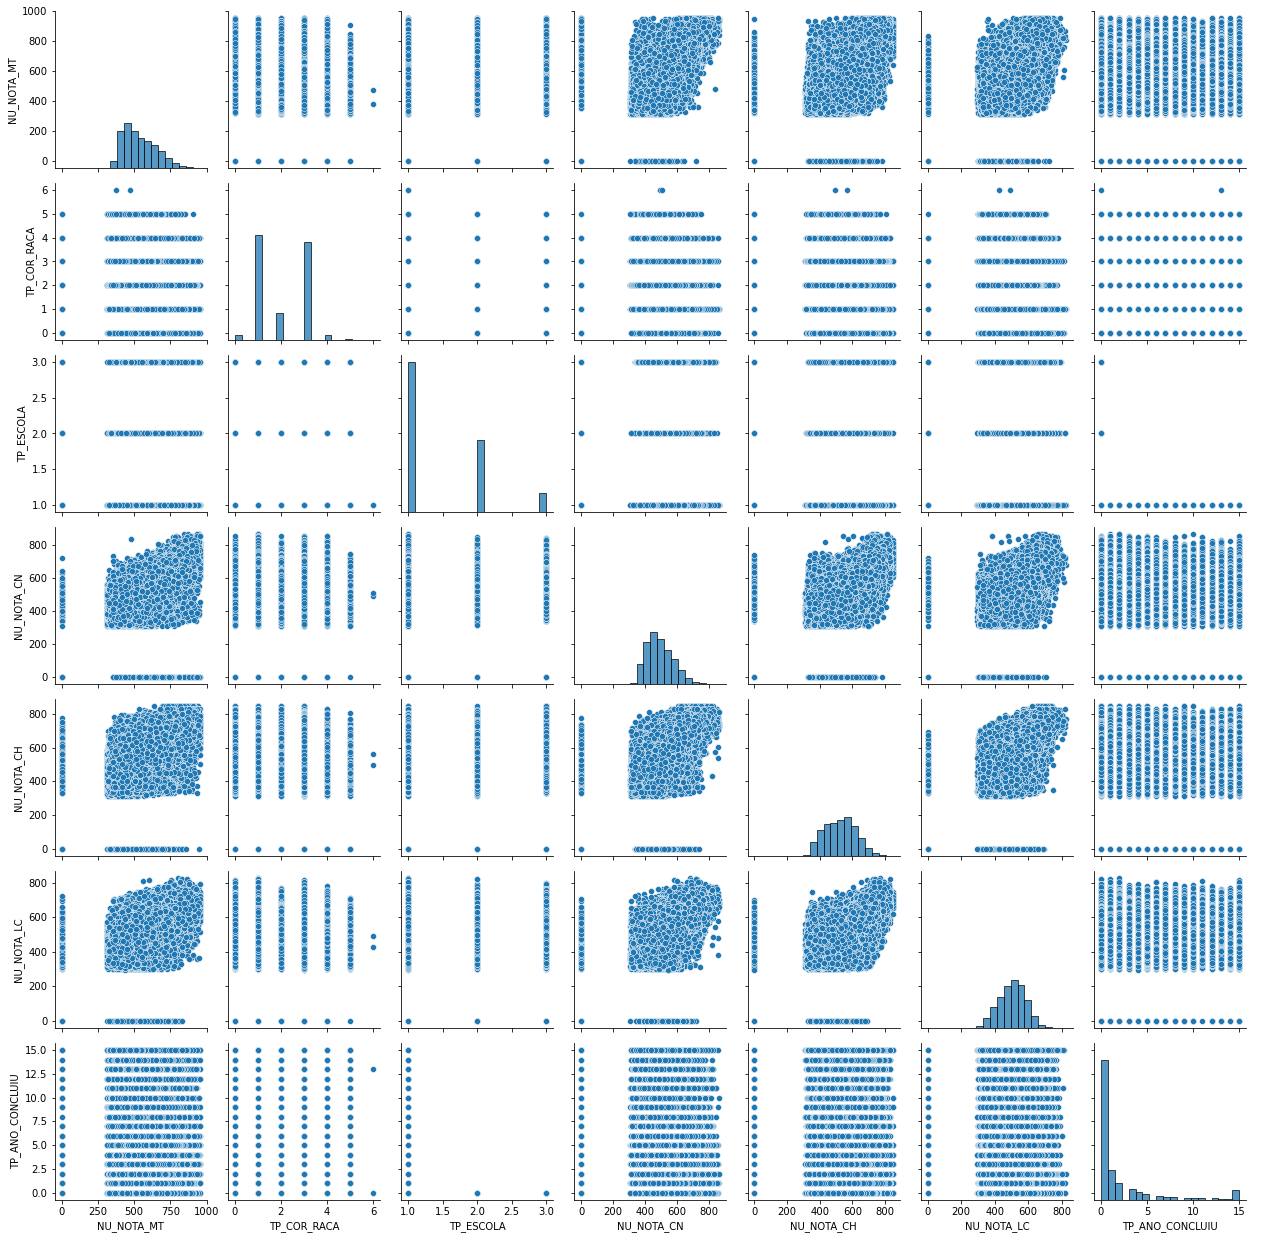

In [19]:
g = sns.PairGrid(df2)
g.map_diag(sns.histplot, bins=20)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [20]:
# Criando dicionário e função
dict_alph2numeric = {
    'A':1,
    'B':2,
    'C':3,
    'D':4,
    'E':5,
    'F':6,
    'G':7,
    'H':0
  }

def alph2num(nota_alpha):
  return int(dict_alph2numeric[nota_alpha]) if dict_alph2numeric.get(nota_alpha) else 0

# converter nota alph to num
df2['NQ002'] = df2['Q002'].apply(lambda x: alph2num(x))

# displaying the data frame
df2.head()

<ipython-input-20-e29bdb6a34fe>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NQ002'] = df2['Q002'].apply(lambda x: alph2num(x))


,NU_NOTA_MT,TP_COR_RACA,TP_ESCOLA,TP_SEXO,Q002,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_ANO_CONCLUIU,NQ002
1,461.5,1,1,M,B,505.9,551.8,498.3,11,2
3,659.5,3,2,M,B,580.7,678.9,638.9,0,2
4,582.6,3,2,F,E,497.7,532.4,457.6,0,5
8,493.4,3,2,F,B,487.4,476.5,450.7,0,2
9,413.3,3,2,F,D,507.6,539.2,494.6,0,4


In [21]:
df2[['TP_ANO_CONCLUIU','NU_NOTA_MT']].groupby("TP_ANO_CONCLUIU", group_keys=True).apply(lambda x: x.mean())

,TP_ANO_CONCLUIU,NU_NOTA_MT
TP_ANO_CONCLUIU,,
0,0.0,528.878932
1,1.0,547.432556
2,2.0,548.365657
3,3.0,548.882630
4,4.0,551.133512
5,5.0,552.145698
6,6.0,546.423842
7,7.0,543.482097
8,8.0,541.685364


In [25]:
df2[['TP_ANO_CONCLUIU','NU_NOTA_MT','NU_NOTA_CN']].groupby('TP_ANO_CONCLUIU').agg({'NU_NOTA_MT': ['count','mean']})

NU_NOTA_MT            
                     count        mean
TP_ANO_CONCLUIU                       
0                  1308581  528.878932
1                   277350  547.432556
2                   158710  548.365657
3                   100288  548.882630
4                    70929  551.133512
5                    50613  552.145698
6                    38994  546.423842
7                    31045  543.482097
8                    24788  541.685364
9                    21019  540.328355
10                   17027  540.952569
11                   15399  532.399812
12                   13866  532.424405
13                   11901  531.547500
14                   11075  523.878185
15                   94259  517.689568

In [26]:
df2[['TP_ANO_CONCLUIU','NU_NOTA_MT','NU_NOTA_CN']].groupby('TP_ANO_CONCLUIU').agg({'NU_NOTA_MT': ['count','mean'],'NU_NOTA_CN': ['mean']})

NU_NOTA_MT              NU_NOTA_CN
                     count        mean        mean
TP_ANO_CONCLUIU                                   
0                  1308581  528.878932  482.572037
1                   277350  547.432556  499.200477
2                   158710  548.365657  503.792964
3                   100288  548.882630  506.350789
4                    70929  551.133512  509.624447
5                    50613  552.145698  511.664946
6                    38994  546.423842  509.403621
7                    31045  543.482097  508.721733
8                    24788  541.685364  509.334363
9                    21019  540.328355  508.159284
10                   17027  540.952569  510.528719
11                   15399  532.399812  506.813962
12                   13866  532.424405  508.561106
13                   11901  531.547500  510.391295
14                   11075  523.878185  506.161011
15                   94259  517.689568  504.588174

Text(0.5, 1.0, 'COR_RACA')

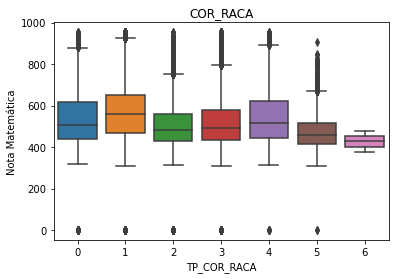

In [38]:
sns.boxplot(x='TP_COR_RACA',y= 'NU_NOTA_MT', data = df2)
plt.ylabel("Nota Matemática")
plt.title("COR_RACA")

Text(0.5, 1.0, 'Escolaridade Mãe')

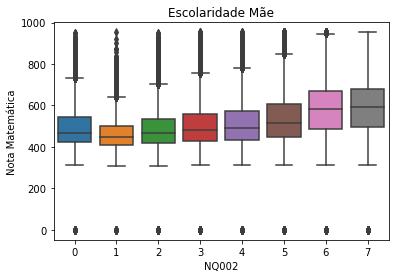

In [42]:
sns.boxplot(x='NQ002',y= 'NU_NOTA_MT', data = df2)
plt.ylabel("Nota Matemática")
plt.title("Escolaridade Mãe")

Text(0.5, 1.0, 'Tipo de Escola')

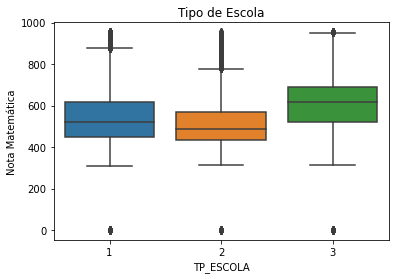

In [40]:
sns.boxplot(x='TP_ESCOLA',y= 'NU_NOTA_MT', data = df2)
plt.ylabel("Nota Matemática")
plt.title("Tipo de Escola")

Text(0.5, 1.0, 'Escolaridade Mãe')

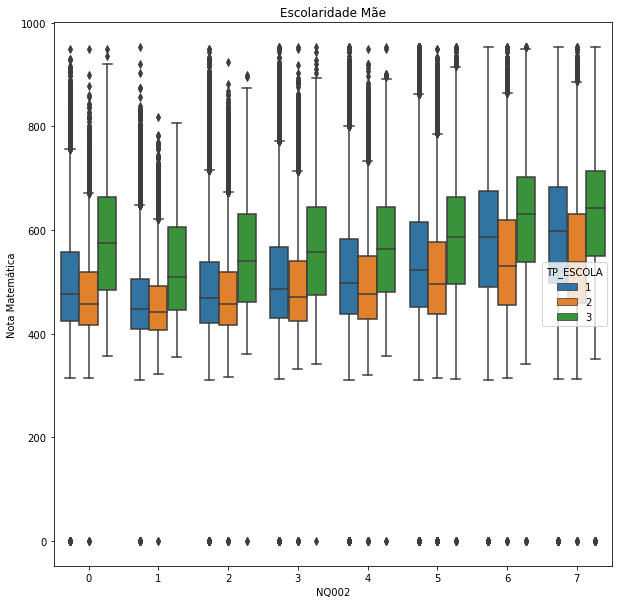

In [31]:
plt.figure(figsize=(10,10))

sns.boxplot(x='NQ002',y= 'NU_NOTA_MT',hue='TP_ESCOLA', data = df2)
plt.ylabel("Nota Matemática")
plt.title("Escolaridade Mãe")

## Ajuste do Modelo

**Variável TP_Escola:**

Tipo de escola do Ensino Médio

    1	Não Respondeu
    2	Pública
    3	Privada
    
**Variável Q002**

Até que série sua mãe, ou a mulher responsável por você, estudou?	

    A	Nunca estudou.
	B	Não completou a 4ª série/5º ano do Ensino Fundamental.
	C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
	D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
	E	Completou o Ensino Médio, mas não completou a Faculdade.
	F	Completou a Faculdade, mas não completou a Pós-graduação.
	G	Completou a Pós-graduação.
	H	Não sei.

## Ajuste de Regressão Logistica com finalidade inferencial

In [15]:
df2.head()

,NU_NOTA_MT,TP_COR_RACA,TP_ESCOLA,TP_SEXO,Q002,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NQ002
1,461.5,1,1,M,B,505.9,551.8,498.3,2
3,659.5,3,2,M,B,580.7,678.9,638.9,2
4,582.6,3,2,F,E,497.7,532.4,457.6,5
8,493.4,3,2,F,B,487.4,476.5,450.7,2
9,413.3,3,2,F,D,507.6,539.2,494.6,4


Retomar como fazer as perguntas 

Qual é a relevância dessa pergunta para a tomada de decisão?
Os dados são adequados para respondê-la?
Sei elencar as respostas prioritárias de acordo com o que está ao alcance da minha decisão?


Formular as perguntas da base

### Regressão Linear 

Ajustando uma regressão Linear com informações do aluno

$NotaMat = \beta_0 + \beta_1*EscMae + \beta_2*Sexo + \beta_3*Raca + \beta_4*NotaCN $

[Documentação do statsmodel ols](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html)

In [35]:
## effect of a waterfront view different for houses that were recently renovated
formula = ('NU_NOTA_MT ~ NU_NOTA_CN')
model_lin = sm.ols(formula=formula, data=df2).fit()
print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                 1.819e+06
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:32:05   Log-Likelihood:            -1.3090e+07
No. Observations:             2245844   AIC:                         2.618e+07
Df Residuals:                 2245842   BIC:                         2.618e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.3466      0.339    245.576      0.0

In [40]:
model_lin.params.NU_NOTA_CN

0.9185577481287706

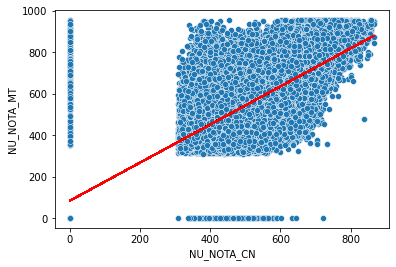

In [46]:
a=sns.scatterplot(data=df2, x="NU_NOTA_CN", y="NU_NOTA_MT")
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(df2.NU_NOTA_CN, model_lin.params.Intercept+model_lin.params.NU_NOTA_CN*df2.NU_NOTA_CN, c='red')

In [28]:
df2['TP_ESCOLA']=df2['TP_ESCOLA'].apply(lambda x:str(x))

## effect of a waterfront view different for houses that were recently renovated
formula = ('NU_NOTA_MT ~ TP_ESCOLA + TP_SEXO  + Q002+NU_NOTA_CN+TP_ANO_CONCLUIU')
model_lin = sm.ols(formula=formula, data=df2).fit()
print(model_lin.summary())

<ipython-input-28-1fcb276f071b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TP_ESCOLA']=df2['TP_ESCOLA'].apply(lambda x:str(x))


                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                 1.734e+05
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:22:12   Log-Likelihood:            -1.3020e+07
No. Observations:             2245843   AIC:                         2.604e+07
Df Residuals:                 2245830   BIC:                         2.604e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          86.9449      0.488    1

In [32]:
df2['nota_pred'] = model_lin.predict(df2)


<ipython-input-32-6ec79d2bac4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['nota_pred'] = model_lin.predict(df2)


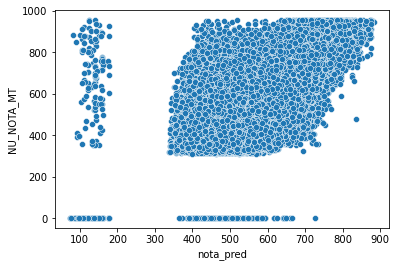

In [34]:
sns.scatterplot(data=df2, x="nota_pred", y="NU_NOTA_MT")
#plt.plot(df.index_pac, reg.intercept_+reg.coef_[0]*df.index_pac, c='red')

In [37]:

## effect of a waterfront view different for houses that were recently renovated
formula = ('NU_NOTA_MT ~ TP_ESCOLA + TP_SEXO  + Q002+NU_NOTA_CN')
model_lin = sm.ols(formula=formula, data=df2).fit()
print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                 2.047e+05
Date:                Qui, 20 Out 2022   Prob (F-statistic):               0.00
Time:                        22:48:19   Log-Likelihood:            -1.3029e+07
No. Observations:             2245843   AIC:                         2.606e+07
Df Residuals:                 2245832   BIC:                         2.606e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       71.2491      0.493    144.422   

## Próximos passos

Acrescentar aqui possíveis futuras abordagens com referências

- Ajuste de Modelos de Regressão Não Lineares + Interpretabilidade
- Análise Multinível